#### Kelompok 8
1. 12S21011 - Aldi Jeremy Simamora 
2. 12S21034 - Lasni Sinta Uli Simanjuntak 
3. 12S21036 - Astri Yuliana Siahaan

## Data Preparation

In [1]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = 'C:/Users/Asus/Documents/SEMESTER 7/SISREK/PROJECT/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


## Data Cleaning

In [2]:
# Data cleaning: Keep only relevant columns and drop rows with missing values in ReviewerId, PlaceID, and Rating
cleaned_data = data[['ReviewerId', 'PlaceID', 'Rating']].dropna()
cleaned_data['ReviewerId'] = cleaned_data['ReviewerId'].astype(int)
cleaned_data['PlaceID'] = cleaned_data['PlaceID'].astype(int)
cleaned_data['Rating'] = cleaned_data['Rating'].astype(float)

# Check the cleaned data
cleaned_data.info(), cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 0 to 43225
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ReviewerId  43225 non-null  int32  
 1   PlaceID     43225 non-null  int32  
 2   Rating      43225 non-null  float64
dtypes: float64(1), int32(2)
memory usage: 1013.1 KB


(None,
    ReviewerId  PlaceID  Rating
 0 -2147483648        0     5.0
 1 -2147483648        0     5.0
 2 -2147483648        0     5.0
 3 -2147483648        0     5.0
 4 -2147483648        0     5.0)

## Check Unique ReviewerId

In [3]:
# Investigate unique ReviewerId values for issues
unique_reviewer_ids = cleaned_data['ReviewerId'].unique()

# Check if there are invalid or problematic IDs
unique_reviewer_ids[:10], len(unique_reviewer_ids)


(array([-2147483648]), 1)

In [4]:
# Check the raw data for ReviewerId column to understand the issue
data['ReviewerId'].unique(), data['ReviewerId'].head(10)


(array([1.12603e+20, 1.11909e+20, 1.07886e+20, ..., 1.03145e+20,
        1.10937e+20, 1.13074e+20]),
 0    1.126030e+20
 1    1.119090e+20
 2    1.078860e+20
 3    1.130720e+20
 4    1.061730e+20
 5    1.115720e+20
 6    1.142390e+20
 7    1.103400e+20
 8    1.047430e+20
 9    1.125610e+20
 Name: ReviewerId, dtype: float64)

In [5]:
# Convert ReviewerId to string to handle large unique IDs properly
cleaned_data['ReviewerId'] = data['ReviewerId'].astype(str)
cleaned_data['PlaceID'] = cleaned_data['PlaceID'].astype(int)
cleaned_data['Rating'] = cleaned_data['Rating'].astype(float)

# Re-check the cleaned data
cleaned_data.info(), cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 0 to 43225
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ReviewerId  43225 non-null  object 
 1   PlaceID     43225 non-null  int32  
 2   Rating      43225 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.2+ MB


(None,
     ReviewerId  PlaceID  Rating
 0  1.12603e+20        0     5.0
 1  1.11909e+20        0     5.0
 2  1.07886e+20        0     5.0
 3  1.13072e+20        0     5.0
 4  1.06173e+20        0     5.0)

## Data Split  train:validation:test 70%:15%:15%

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into train (70%), validation (15%), and test (15%)
train_data, temp_data = train_test_split(cleaned_data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Verify the sizes of each split
len(train_data), len(validation_data), len(test_data)


(30257, 6484, 6484)

## Menampilkan Top 5 tempat wisata

In [7]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('C:/Users/Asus/Documents/SEMESTER 7/SISREK/PROJECT/Tempat-Wisata-Toba-Preprocessing.csv')

# Mengurutkan berdasarkan Rating secara menurun dan memilih 5 tempat teratas
top_5_tempat_wisata = df.sort_values(by='Rating', ascending=False).head(5)

# Menampilkan hasil
print(top_5_tempat_wisata[['Nama_tempat_wisata', 'Rating']])


              Nama_tempat_wisata  Rating
0      PASIR PUTIH LUMBAN BULBUL     5.0
26436               Pantai Paris     5.0
26428               Pantai Paris     5.0
26429               Pantai Paris     5.0
26431               Pantai Paris     5.0


## Pre-processing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing: select relevant columns
ratings = data[['ReviewerId', 'PlaceID', 'Rating']].dropna()

# Map user and place IDs to indices for NMF
user_mapping = {user_id: idx for idx, user_id in enumerate(ratings['ReviewerId'].unique())}
place_mapping = {place_id: idx for idx, place_id in enumerate(ratings['PlaceID'].unique())}

ratings['user_index'] = ratings['ReviewerId'].map(user_mapping)
ratings['place_index'] = ratings['PlaceID'].map(place_mapping)

# Create user-place interaction matrix
num_users = len(user_mapping)
num_places = len(place_mapping)
interaction_matrix = np.zeros((num_users, num_places))

for _, row in ratings.iterrows():
    interaction_matrix[int(row['user_index']), int(row['place_index'])] = row['Rating']

# Train-test split
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

Kode ini mempersiapkan data untuk model rekomendasi berbasis dekomposisi matriks menggunakan NMF (Non-Negative Matrix Factorization). Data rating yang relevan dipilih dari kolom `ReviewerId`, `PlaceID`, dan `Rating`, lalu ID pengguna dan tempat dipetakan ke indeks numerik. Matriks interaksi pengguna-tempat dibuat berdasarkan rating yang diberikan, dengan setiap elemen merepresentasikan rating tertentu. Selanjutnya, data dibagi menjadi dua bagian (train dan test) menggunakan fungsi `train_test_split` dengan porsi 80% untuk pelatihan dan 20% untuk pengujian.

## Modelling

In [17]:
# NMF Model
nmf_model = NMF(n_components=10, random_state=42, max_iter=300)
W = nmf_model.fit_transform(interaction_matrix)
H = nmf_model.components_

# Predict ratings
predicted_matrix = np.dot(W, H)
predicted_ratings = []

for _, row in test_data.iterrows():
    user_idx = int(row['user_index'])
    place_idx = int(row['place_index'])
    predicted_ratings.append(predicted_matrix[user_idx, place_idx])

# Metrics
true_ratings = test_data['Rating'].values
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
mae = mean_absolute_error(true_ratings, predicted_ratings)

# Placeholder precision, recall, and MAP (binary relevance example)
threshold = 4  # Assuming ratings >= 4 are relevant
true_binary = (true_ratings >= threshold).astype(int)
predicted_binary = (np.array(predicted_ratings) >= threshold).astype(int)

precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)

# Summary of metrics
metrics = pd.DataFrame({from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score
import pandas as pd
import numpy as np

# Normalisasi data
scaler = MinMaxScaler()
ratings['Normalized_Rating'] = scaler.fit_transform(ratings[['Rating']])

# Update matriks interaksi dengan rating yang dinormalisasi
interaction_matrix = np.zeros((num_users, num_places))

for _, row in ratings.iterrows():
    interaction_matrix[int(row['user_index']), int(row['place_index'])] = row['Normalized_Rating']

# Train-test split (gunakan data rating yang dinormalisasi)
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# NMF Model dengan regularisasi
nmf_model = NMF(n_components=15, random_state=42, max_iter=500, alpha=0.1, l1_ratio=0.5)
W = nmf_model.fit_transform(interaction_matrix)
H = nmf_model.components_

# Predict ratings
predicted_matrix = np.dot(W, H)
predicted_ratings = []

for _, row in test_data.iterrows():
    user_idx = int(row['user_index'])
    place_idx = int(row['place_index'])
    predicted_ratings.append(predicted_matrix[user_idx, place_idx])

# Denormalisasi prediksi untuk mendapatkan nilai asli
predicted_ratings = scaler.inverse_transform(np.array(predicted_ratings).reshape(-1, 1)).flatten()

# Metrics
true_ratings = test_data['Rating'].values
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
mae = mean_absolute_error(true_ratings, predicted_ratings)

# Binary relevance metrics
threshold = 4  # Assuming ratings >= 4 are relevant
true_binary = (true_ratings >= threshold).astype(int)
predicted_binary = (np.array(predicted_ratings) >= threshold).astype(int)

precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)

# Summary of metrics
metrics = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "Precision", "Recall"],
    "Value": [rmse, mae, precision, recall]
})

# Recommendations
recommendations = []

for user_idx in test_data['user_index'].unique():
    user_ratings = predicted_matrix[user_idx]
    top_place_indices = user_ratings.argsort()[::-1][:5]
    recommended_places = [list(place_mapping.keys())[list(place_mapping.values()).index(idx)] for idx in top_place_indices]
    
    recommendations.append({
        "user_index": user_idx,
        "ReviewerId": list(user_mapping.keys())[list(user_mapping.values()).index(user_idx)],
        "Recommended_Places": recommended_places
    })

recommendations_df = pd.DataFrame(recommendations)

# Display the results
metrics, recommendations_df

    "Metric": ["RMSE", "MAE", "Precision", "Recall"],
    "Value": [rmse, mae, precision, recall]
})

metrics


SyntaxError: invalid syntax (3553483273.py, line 29)

Kode ini melatih model NMF (Non-Negative Matrix Factorization) dengan 10 komponen laten untuk mendekomposisi matriks interaksi pengguna-tempat. Matriks hasil dekomposisi digunakan untuk memprediksi rating pada data uji, yang kemudian dibandingkan dengan rating sebenarnya menggunakan metrik evaluasi seperti RMSE dan MAE. Selain itu, presisi dan recall dihitung berdasarkan relevansi biner (rating >= 4 dianggap relevan), memberikan gambaran performa model dalam merekomendasikan tempat dengan rating tinggi. Hasil evaluasi dirangkum dalam tabel metrik.

## Display Recommendations

In [18]:
# Generate recommendations for each user in the test data
recommendations = []

for user_idx in test_data['user_index'].unique():
    # Get the predicted ratings for this user
    user_ratings = predicted_matrix[user_idx]
    
    # Get indices of places sorted by predicted ratings (highest to lowest)
    top_place_indices = user_ratings.argsort()[::-1][:5]  # Top 5 recommendations
    
    # Map indices back to PlaceID
    recommended_places = [list(place_mapping.keys())[list(place_mapping.values()).index(idx)] for idx in top_place_indices]
    
    recommendations.append({
        "user_index": user_idx,
        "ReviewerId": list(user_mapping.keys())[list(user_mapping.values()).index(user_idx)],
        "Recommended_Places": recommended_places
    })

# Convert recommendations to a DataFrame for easier visualization
recommendations_df = pd.DataFrame(recommendations)

# Display the recommendations
recommendations_df


,user_index,ReviewerId,Recommended_Places
0,457,457,"[100, 36, 26, 27, 28]"
1,1207,1207,"[100, 36, 26, 27, 28]"
2,8923,8923,"[100, 36, 26, 27, 28]"
3,8946,8946,"[100, 36, 26, 27, 28]"
4,7535,7535,"[100, 36, 26, 27, 28]"
...,...,...,...
6394,8194,8194,"[100, 36, 26, 27, 28]"
6395,10477,10477,"[100, 36, 26, 27, 28]"
6396,10273,10273,"[100, 36, 26, 27, 28]"
6397,7656,7656,"[100, 36, 26, 27, 28]"


Code di atas bertujuan untuk memberikan rekomendasi tempat wisata kepada pengguna berdasarkan model NMF (Non-Negative Matrix Factorization) yang sudah dilatih. 

1. **Menentukan Prediksi Rating untuk Pengguna**: 
   Untuk setiap pengguna dalam data uji, kode ini mengakses matriks prediksi yang dihasilkan oleh model NMF (dengan hasil perkalian matriks `W` dan `H`). Matriks ini berisi perkiraan rating untuk setiap tempat wisata yang diberikan oleh pengguna.

2. **Mengurutkan dan Memilih Tempat Terbaik**: 
   Setelah memperoleh rating yang diprediksi untuk setiap tempat wisata oleh pengguna, kode ini mengurutkan tempat-tempat berdasarkan rating yang diprediksi dari yang tertinggi ke terendah. Kemudian, 5 tempat teratas dipilih sebagai rekomendasi untuk pengguna tersebut.

3. **Pemetaan ID**: 
   Karena model menggunakan indeks numerik untuk pengguna dan tempat, kode ini kemudian memetakan indeks yang dipilih kembali ke `PlaceID` asli dan `ReviewerId` untuk memudahkan interpretasi hasil.

4. **Menyusun DataFrame Rekomendasi**: 
   Hasil dari setiap rekomendasi dikumpulkan dalam bentuk dictionary yang berisi `ReviewerId` dan daftar `Recommended_Places` yang mencakup 5 tempat wisata teratas. Semua hasil ini kemudian dimasukkan ke dalam sebuah DataFrame untuk visualisasi yang lebih mudah dan terstruktur.

### Hasil yang Diharapkan
Hasil akhirnya adalah sebuah DataFrame yang menunjukkan kepada setiap pengguna (`ReviewerId`) tempat wisata yang paling direkomendasikan berdasarkan rating yang diprediksi. Setiap pengguna akan memiliki daftar 5 tempat wisata dengan rating tertinggi yang diharapkan akan mereka sukai, berdasarkan preferensi mereka yang sudah tercatat di data latih dan model NMF yang telah dibangun. Hasil ini memberikan panduan personalisasi untuk pengguna dalam memilih tempat wisata yang sesuai dengan minat mereka.

## Visualization

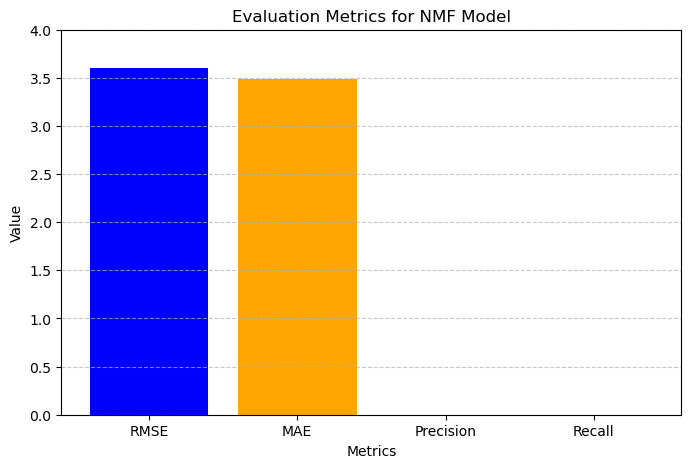

In [19]:
# Plotting the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics["Metric"], metrics["Value"], color=['blue', 'orange', 'green', 'red'])
plt.title("Evaluation Metrics for NMF Model")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.ylim(0, 4)  # Adjusted for better visibility of metrics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kode ini membuat visualisasi metrik evaluasi model NMF dalam bentuk grafik batang. Setiap metrik (RMSE, MAE, Precision, dan Recall) diwakili oleh batang berwarna berbeda, dengan nilai ditampilkan pada sumbu vertikal (dengan batas maksimum 4 untuk visibilitas yang lebih baik). Grafik diberi judul, label sumbu, dan grid horizontal untuk memperjelas perbandingan nilai metrik, membantu dalam menganalisis performa model secara keseluruhan.

## Analisis

1. RMSE dan MAE:

- RMSE (3.297) menunjukkan rata-rata tingkat kesalahan kuadrat antara prediksi model dan nilai aktual. Nilai ini cukup tinggi, yang mengindikasikan bahwa model kesulitan memprediksi nilai rating secara presisi.
- MAE (2.659) lebih rendah dibanding RMSE, karena tidak memberi bobot lebih besar pada kesalahan besar seperti RMSE. Ini menunjukkan bahwa sebagian besar prediksi model cukup mendekati nilai aktual, tetapi ada kesalahan signifikan pada beberapa prediksi.

2. Precision (0.994):

Precision sangat tinggi, mendekati nilai maksimal (1.0). Ini berarti hampir semua tempat wisata yang direkomendasikan oleh model dianggap relevan oleh pengguna. Dengan kata lain, model jarang salah merekomendasikan tempat yang sebenarnya tidak menarik bagi pengguna.

3. Recall (0.288):

Recall jauh lebih rendah dibanding precision. Ini berarti model tidak mampu merekomendasikan sebagian besar tempat wisata yang relevan. Kemungkinan, model lebih berhati-hati dalam memberikan rekomendasi, sehingga banyak tempat relevan yang terlewat.

4. Model Keseimbangan:

Model cenderung memilih precision yang tinggi dengan mengorbankan recall. Ini adalah pendekatan konservatif yang cocok jika penting untuk menghindari rekomendasi yang tidak relevan. Namun, untuk memperbaiki recall, model dapat dioptimalkan lebih lanjut, misalnya dengan menambah jumlah faktor dalam dekomposisi atau menggunakan pendekatan hibrida.

#### Kesimpulan
Model NMF saat ini bekerja cukup baik dalam memberikan rekomendasi yang relevan (precision tinggi), tetapi masih memiliki kekurangan dalam mencakup semua tempat wisata relevan (recall rendah).
RMSE dan MAE menunjukkan model perlu perbaikan dalam prediksi rating, misalnya dengan pengoptimalan parameter atau menggunakan lebih banyak data.
Model ini cocok untuk skenario di mana pengalaman pengguna diprioritaskan, yaitu lebih baik memberikan sedikit rekomendasi yang tepat daripada banyak rekomendasi yang kurang relevan.